# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
log_rtg=linear_model.Logi

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [3]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [5]:
df['balance'].isnull().sum()

25

### Задание 2

In [6]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [7]:
df['balance']

0         2 343,00 $ 
1            45,00 $ 
2         1 270,00 $ 
3         2 476,00 $ 
4           184,00 $ 
             ...     
11157         1,00 $ 
11158       733,00 $ 
11159        29,00 $ 
11160           0  $ 
11161           0  $ 
Name: balance, Length: 11162, dtype: object

In [8]:
df['balance']=df['balance'].replace([',00', '\$', ' '], '', regex=True).astype('float')

In [9]:
round(df['balance'].mean(), 3)

1529.129

### Задание 4

In [10]:
df['balance'].fillna(df['balance'].median(), inplace=True)

In [11]:
round(df['balance'].mean(), 3)

1526.936

### Задание 5

In [12]:
df['job'].mode()

0    management
Name: job, dtype: object

In [13]:
df['job']=df['job'].apply(lambda x: 'management' if x=='unknown' else x)
df['education']=df['education'].apply(lambda x: 'secondary' if x=='unknown' else x)

In [14]:
df.groupby(['job', 'education'])[['balance']].mean()

balance
job           education             
admin.        primary     775.928571
              secondary  1189.494662
              tertiary   1343.482143
blue-collar   primary    1304.818444
              secondary  1125.866889
              tertiary   1730.062500
entrepreneur  primary    1314.707317
              secondary  1304.445161
              tertiary   2090.189394
housemaid     primary    1366.444444
              secondary  1018.229885
              tertiary   2069.162791
management    primary    1841.534247
              secondary  1598.882979
              tertiary   1826.104710
retired       primary    2222.631769
              secondary  2594.966759
              tertiary   2314.992857
self-employed primary    1254.928571
              secondary  1373.517007
              tertiary   2254.047826
services      primary    1383.554217
              secondary  1028.724269
              tertiary   1279.754717
student       primary    1492.047619
              secondary  1333.574219
              tertiary   2018.722892
technician    primary    1805.975610
              secondary  1461.055511
              tertiary   1766.792706
unemployed    primary    1607.392857
              secondary  1147.082949
              tertiary   1552.666667

### Задание 6

In [15]:
quartile_1, quartile_3 = df['balance'].quantile(0.25), df['balance'].quantile(0.75)
iqr=quartile_3-quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

In [16]:
# удаление выбросов 
df=df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

In [17]:
df.shape

(10105, 17)

## Часть 2:  Разведывательный анализ

### Задание 1

In [18]:
df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

no     5424
yes    4681
Name: deposit, dtype: int64


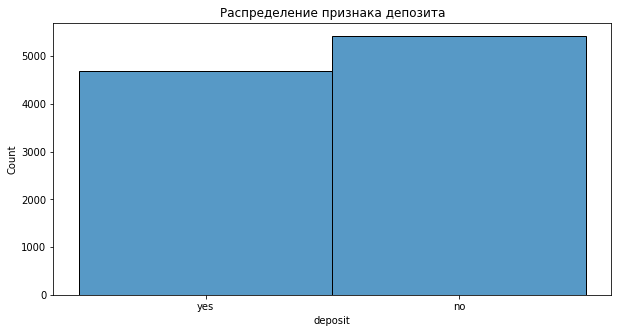

In [19]:
print (df['deposit'].value_counts())

# график 
fig, axes = plt.subplots(figsize=(10, 5))
sns.histplot(df['deposit'])
axes.set_title('Распределение признака депозита');

**Вывод** Признак сбалансирован

### Задания 2 и 3

In [20]:
from pandas_profiling import ProfileReport

In [21]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df.groupby(['month'])[['deposit']].value_counts()

month  deposit
apr    yes         513
       no          317
aug    no          775
       yes         610
dec    yes          84
       no            9
feb    yes         386
       no          323
jan    no          194
       yes         125
jul    no          836
       yes         582
jun    no          606
       yes         498
mar    yes         213
       no           24
may    no         1776
       yes         841
nov    no          456
       yes         324
oct    yes         273
       no           62
sep    yes         232
       no           46
dtype: int64

In [ ]:
def age_group(x):
    if x <= 30:
        return 1
    elif 30 < x <= 50:
        return 2
    elif 40 < x <= 50:
        return 3
    elif 50 < x <= 60:
        return 4
    else:
        return 5

In [ ]:
df['age']=df['age'].apply(age_group)

In [ ]:
df.groupby('marital')[['deposit']].value_counts()

marital   deposit
divorced  no          624
          yes         553
married   no         3303
          yes        2412
single    yes        1716
          no         1497
dtype: int64

In [ ]:
df.groupby(['marital', 'education'])[['deposit']].value_counts()

marital   education  deposit
divorced  primary    yes          96
                     no           91
          secondary  no          370
                     yes         283
          tertiary   yes         174
                     no          163
married   primary    no          641
                     yes         339
          secondary  no         1830
                     yes        1289
          tertiary   no          832
                     yes         784
single    primary    no          100
                     yes          82
          secondary  yes         879
                     no          866
          tertiary   yes         755
                     no          531
dtype: int64

## Часть 3: преобразование данных

### Задание 1

In [ ]:
LE=LabelEncoder()
df['education']=LE.fit_transform(df['education'])

In [ ]:
df['education'].sum()

11995

In [ ]:
df['age']=LE.fit_transform(df['age'])

### Задания 2 и 3

In [ ]:
df['deposit']=df['deposit'].apply(lambda x: 1 if x == 'yes' else 0).astype('int')
df['default']=df['default'].apply(lambda x: 1 if x == 'yes' else 0).astype('int')
df['housing']=df['housing'].apply(lambda x: 1 if x == 'yes' else 0).astype('int')
df['loan']=df['loan'].apply(lambda x: 1 if x == 'yes' else 0).astype('int')

In [ ]:
round( df['default'].mean()+df['housing'].mean()+df['loan'].mean(), 3)

0.635

### Задание 4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  int64  
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  int32  
 4   default    10105 non-null  int32  
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  int32  
 7   loan       10105 non-null  int32  
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  int32  
dtypes: float64(1), int32(5), int64(6), object(5)
memory usage: 1.2+ MB


In [ ]:
df=pd.get_dummies(df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   education          10105 non-null  int32  
 2   default            10105 non-null  int32  
 3   balance            10105 non-null  float64
 4   housing            10105 non-null  int32  
 5   loan               10105 non-null  int32  
 6   day                10105 non-null  int64  
 7   duration           10105 non-null  int64  
 8   campaign           10105 non-null  int64  
 9   pdays              10105 non-null  int64  
 10  previous           10105 non-null  int64  
 11  deposit            10105 non-null  int32  
 12  job_admin.         10105 non-null  uint8  
 13  job_blue-collar    10105 non-null  uint8  
 14  job_entrepreneur   10105 non-null  uint8  
 15  job_housemaid      10105 non-null  uint8  
 16  job_management     101

### Задания 5 и 6

<AxesSubplot:>

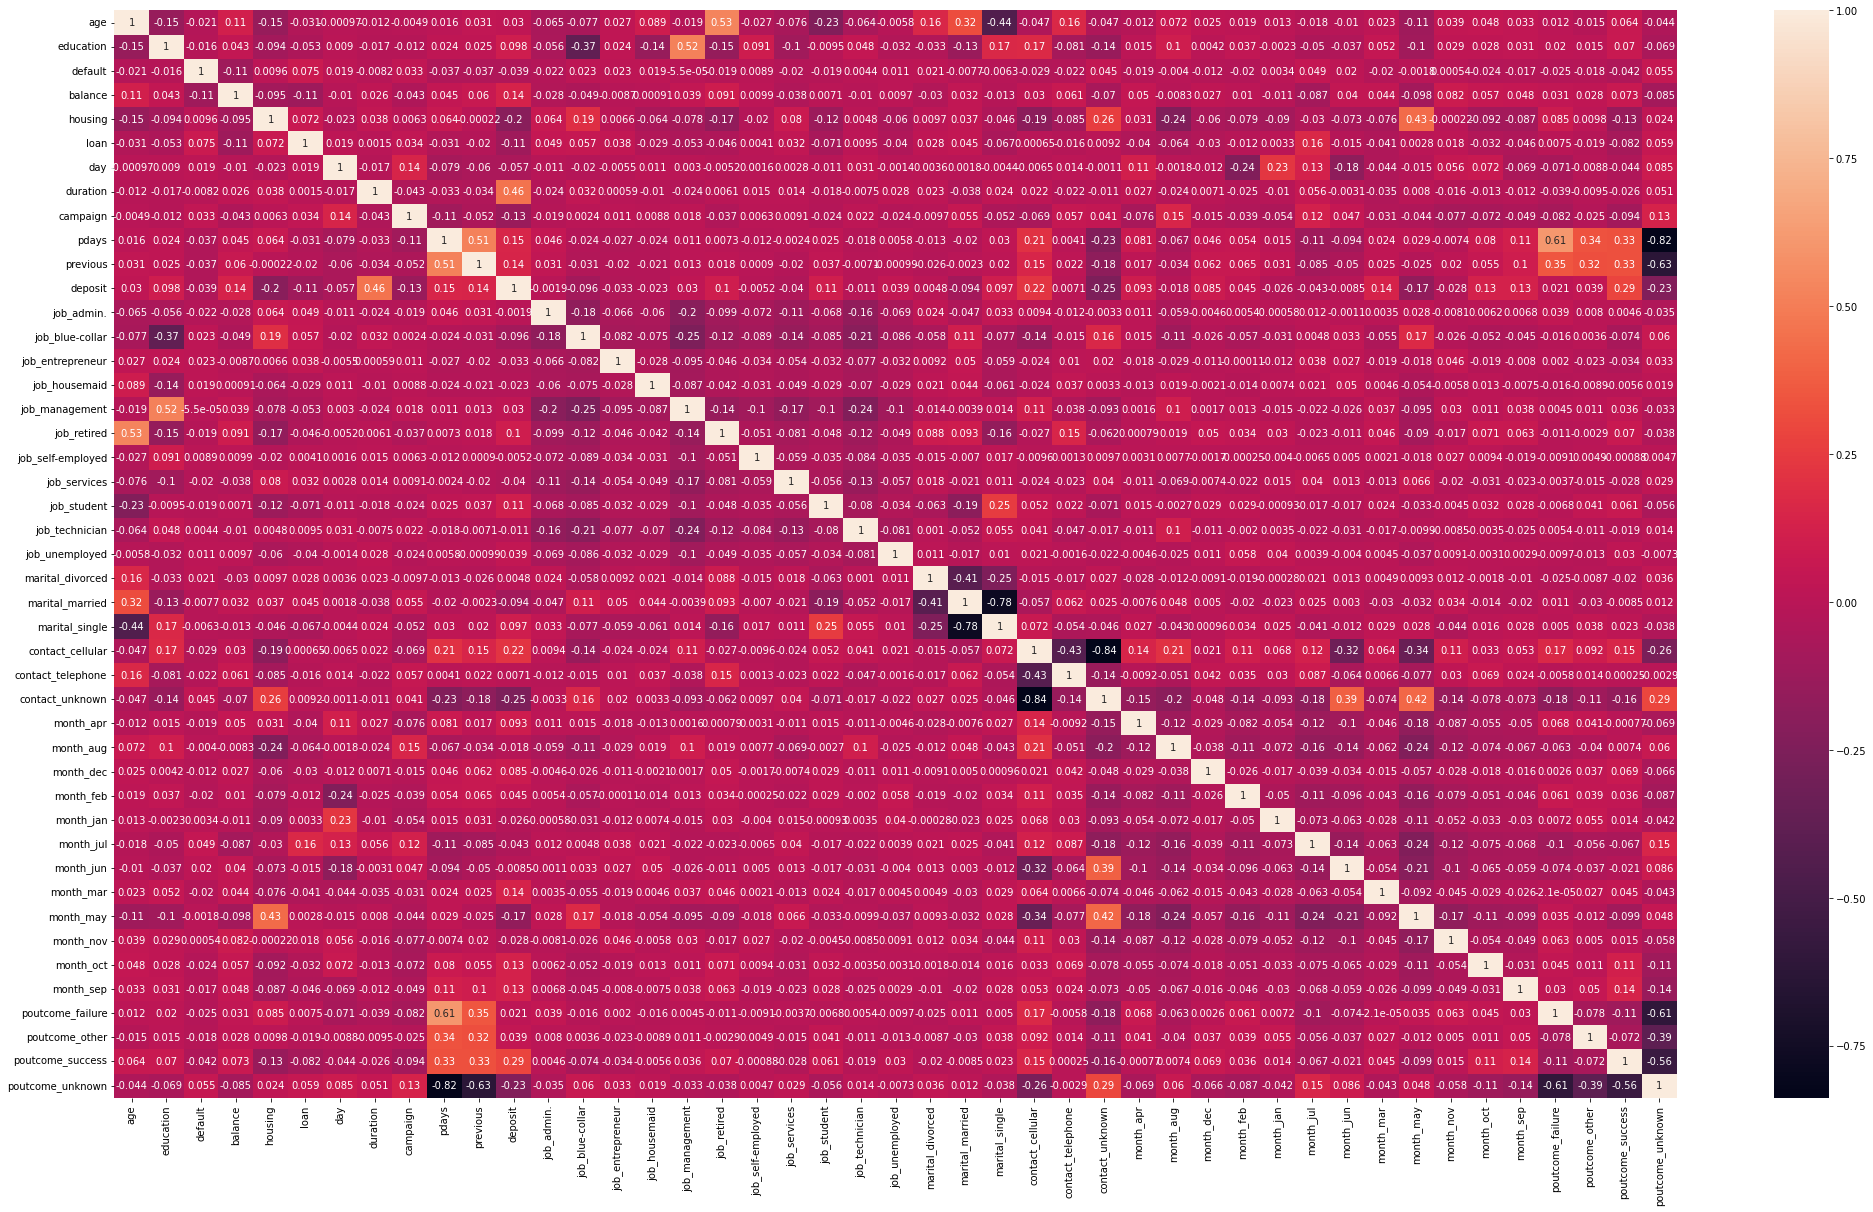

In [ ]:
fig, axes = plt.subplots( figsize=(35, 20))
sns.heatmap(df.corr(), annot=True)

### Задания 7 и 8

In [ ]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
round(y_test.mean(), 2)

0.46

### Задание 9

In [ ]:
selector=SelectKBest(score_func = f_classif, k=15)
selector.fit(X_train, y_train)
selector.get_feature_names_out()

array(['balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Задание 10

In [ ]:
X = df[['balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown']]
y=df['deposit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
scaler=preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [ ]:
X_test_scaler[:, 0].mean()

0.46823674223097866

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
log_reg=linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaler, y_train)
y_pred_train=log_reg.predict(X_train_scaler)
y_pred_test=log_reg.predict(X_test_scaler)

In [ ]:
print ('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Test accuracy: 0.80


### Задания 2,3,4

In [ ]:
dt=tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)
dt.fit(X_train_scaler, y_train)
y_pred_train=dt.predict(X_train_scaler)
y_pred_test=dt.predict(X_test_scaler)


In [ ]:
print ('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train)))

Test accuracy: 0.82


In [ ]:
print ('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Test accuracy: 0.80


### Задание 5

In [ ]:
space = {'min_samples_leaf': [2, 5, 7, 10],
         'max_depth': [3, 5, 7]}

GS = GridSearchCV(
    estimator=dt,
    param_grid=space,

)

GS.fit(X_train_scaler, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(GS.score(X_test_scaler, y_test)))
y_test_pred = GS.predict(X_test_scaler)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(GS.best_params_))

accuracy на тестовом наборе: 0.81
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_leaf': 10}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [ ]:
RF=ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
RF.fit(X_train_scaler, y_train)
y_pred_train=RF.predict(X_train_scaler)
y_pred_test=RF.predict(X_test_scaler)

In [ ]:
print (round(metrics.f1_score(y_test, y_pred_test), 2))

0.82


### Задания 2 и 3

In [ ]:
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)

y_pred_train=GB.predict(X_train_scaler)
y_pred_test=GB.predict(X_test_scaler)

NameError: name 'ensemble' is not defined

In [ ]:
round(metrics.f1_score(y_test, y_pred_test))

1

### Задание 4

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna